<a href="https://colab.research.google.com/github/PraveenPrabhat125/Stock_market_analysis-/blob/main/market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# import data
import pandas as pd
import numpy as np
market_data = pd.read_excel('/content/market_test_data.xlsx')

In [29]:
# normalise the score
# market_data.info()
market_data = pd.read_excel('/content/market_test_data.xlsx')
market_data.columns

Index(['Name', 'CMP', 'P_E', 'MCAP', 'Div_Yld_%', 'NP_Qtr_Rs.Cr.',
       'Qtr_Profit_Var_%', 'Sales_Qtr_Rs.Cr.', 'Qtr_Sales_Var_%', 'ROCE_%',
       'Debt_Eq', 'Ind_PE'],
      dtype='object')

# final code

In [32]:
import pandas as pd
import numpy as np

# Read data from Excel file
market_data = pd.read_excel('/content/market_test_data.xlsx')

# Define weights
weights = {
    'CMP': 0.10,
    'P_E': 0.15,
    'MCAP': 0.10,
    'Div_Yld_%': 0.08,
    'NP_Qtr_Rs.Cr.': 0.12,
    'Qtr_Profit_Var_%': 0.08,
    'Sales_Qtr_Rs.Cr.': 0.10,
    'Qtr_Sales_Var_%': 0.07,
    'ROCE_%': 0.10,
    'Debt_Eq': 0.05,
    'Ind_PE': 0.05,
    'CMP/BV': 0.05
}

# Function to calculate the final score
def calculate_final_score(row, weights):
    # Extract relevant columns from the row
    indicators = row[['CMP', 'P_E', 'MCAP', 'Div_Yld_%',
                      'NP_Qtr_Rs.Cr.', 'Qtr_Profit_Var_%', 'Sales_Qtr_Rs.Cr.',
                      'Qtr_Sales_Var_%', 'ROCE_%', 'Debt_Eq', 'Ind_PE']]

    # Remove extra spaces from column names
    indicators.index = indicators.index.str.strip()

    # Extract weights for the relevant indicators
    relevant_weights = {key: weights[key] for key in indicators.index}

    # Calculate the final score for the row
    final_score = np.sum(np.multiply(indicators, list(relevant_weights.values())))

    return final_score

# Calculate final score for each stock
market_data['Final Score'] = market_data.apply(lambda row: calculate_final_score(row, weights), axis=1)

# Display the DataFrame with the added 'Final Score' column
print(market_data[['Name', 'CMP', 'P_E', 'MCAP', 'Div_Yld_%',
                   'NP_Qtr_Rs.Cr.', 'Qtr_Profit_Var_%', 'Sales_Qtr_Rs.Cr.',
                   'Qtr_Sales_Var_%', 'ROCE_%', 'Debt_Eq', 'Ind_PE', 'Final Score']])
market_data.columns

                Name    CMP     P_E      MCAP  Div_Yld_%  NP_Qtr_Rs.Cr.  \
0      Reliance Home   5.70    0.04    257.81       0.00          -2.56   
1       PVP Ventures  15.90     NaN    410.16       0.00          -4.08   
2     Seacoast Ship.   4.95   13.25    266.65       0.00           7.73   
3   Rajnandini Metal  17.00   26.36    470.02       0.39           6.50   
4   Maximus Interna.  19.66   43.14    247.17       0.00           1.28   
5    Indian Acrylics  15.31     NaN    207.17       0.00         -24.74   
6     Goldstar Power  16.25   94.25    391.15       0.00           2.26   
7      Captain Pipes  19.14   69.46    282.72       0.00           2.06   
8      Filatex Fash.  16.87  255.40   2811.92       0.00           1.87   
9   GVK Power Infra.  13.50   15.87   2118.79       0.00         156.15   
10  Integra Essentia  12.25   44.16    555.54       0.00           7.54   
11      Madhav Infra  13.04   15.51    351.54       0.00           7.96   
12    Sadbhav Infra.   6.

Index(['Name', 'CMP', 'P_E', 'MCAP', 'Div_Yld_%', 'NP_Qtr_Rs.Cr.',
       'Qtr_Profit_Var_%', 'Sales_Qtr_Rs.Cr.', 'Qtr_Sales_Var_%', 'ROCE_%',
       'Debt_Eq', 'Ind_PE', 'Final Score'],
      dtype='object')

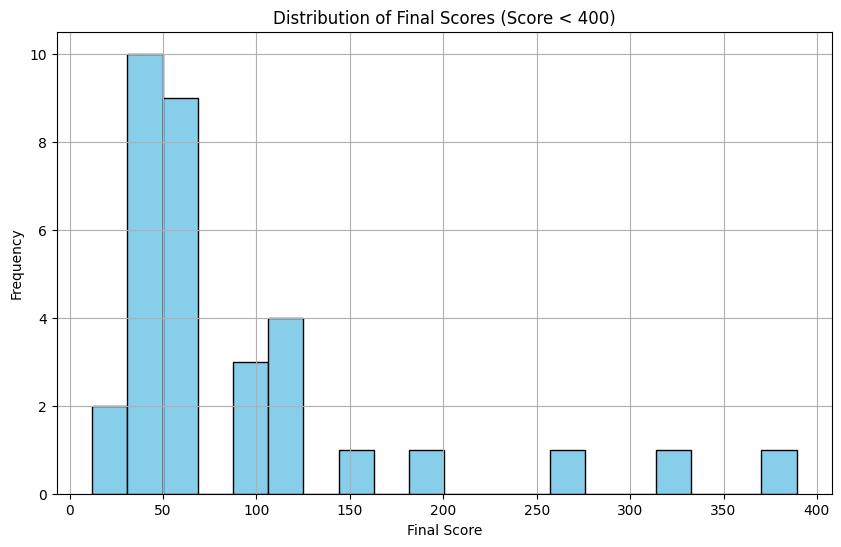

In [34]:
import matplotlib.pyplot as plt
# Filter rows where 'Final Score' is less than 400
filtered_data = market_data[market_data['Final Score'] < 400]

# Plot histogram of the filtered scores
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Final Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Scores (Score < 400)')
plt.xlabel('Final Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [38]:
# Define score ranges
score_ranges = [0, 60, 80, 100, 150, 200, 500, float('inf')]

# Create bins using pd.cut
bins = pd.cut(market_data['Final Score'], bins=score_ranges, right=False)

# Count the occurrences in each bin
score_distribution = pd.value_counts(bins, sort=False)

# Display the count for each range
print(score_distribution)


[0.0, 60.0)       17
[60.0, 80.0)       4
[80.0, 100.0)      2
[100.0, 150.0)     6
[150.0, 200.0)     1
[200.0, 500.0)     3
[500.0, inf)       2
Name: Final Score, dtype: int64


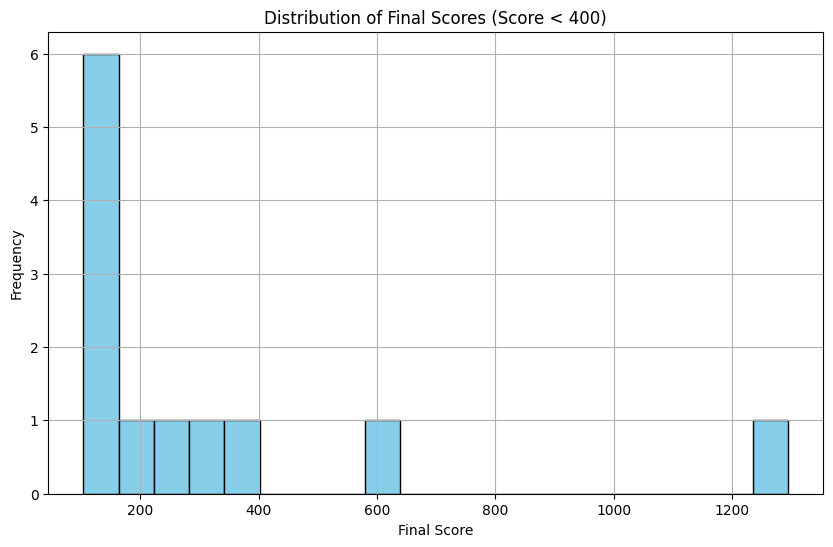

In [37]:
import matplotlib.pyplot as plt
# Filter rows where 'Final Score' is less than 400
filtered_data = market_data[market_data['Final Score'] > 100]

# Plot histogram of the filtered scores
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Final Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Scores (Score < 400)')
plt.xlabel('Final Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [40]:
# Filter rows where 'Final Score' is greater than 60
filtered_data = market_data[market_data['Final Score'] > 60]

# Sort the filtered data by 'MCAP' and 'Final Score' in descending order
final_list = filtered_data.sort_values(by=['MCAP', 'Final Score'], ascending=[False, False])

# Display the final list
print(final_list[['Name', 'MCAP', 'Final Score']])
final_list.to_excel('summaryS>60.xlsx')


                Name      MCAP  Final Score
33     JP Power Ven.  11191.80    1294.2611
20  Rattanindia Pow.   6127.55     619.5619
8      Filatex Fash.   2811.92     325.0113
9   GVK Power Infra.   2118.79     266.6398
21    Steel Exchange   1560.42     149.0753
17    Syncom Formul.   1558.61     184.0772
14    Rhetan TMT Ltd    791.30     107.8080
23  Sarveshwar Foods    682.00     121.3394
27     Vikas Ecotech    565.72      68.5703
10  Integra Essentia    555.54      96.7023
3   Rajnandini Metal    470.02     104.1082
24  Std. Capital Mkt    454.23     118.9016
6     Goldstar Power    391.15      61.4002
16    Variman Global    373.79     120.3076
31  Nila Infrastruct    365.53     389.1582
15       Gennex Lab.    353.83      63.3645
13     Kritika Wires    338.17      67.0171
7      Captain Pipes    282.72      92.4963
